# $ Partie$   $code  $


# $3 - Probabilités$

### $ \textit{ 3.1 Implémentation de la méthode P(D) }$

$ \text{ Cette fonction retourne une matrice ((D+1)} \times \text{(6*D+1)) qui désigne la probabilité d'obtenir k points en jettant d dès.}$ <br> $ \text{ (le nombre de dès en ligne et le nombre de points en colonnes) } $

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
plt.rcParams["figure.figsize"] = (15,10)

In [26]:
# On a utilisé les indices à partir de 1 afin de garder la signification des indices ( l'indice (1,1)-> obtenir 1 point en jettant 1 dès) 
def P(d):
    # déclaration des deux matrices p et q
    # k a une valeur maximale de 6*d 
    p=np.zeros((d+1,6*d+1))
    q=np.zeros((d+1,6*d+1))
    
    #intialisation p
    # en utilisant un dè toutes les surfaces sont équiprobales
    p[1,2:7]=1/6
    
    # la probabilité qu'au moins un dè tombe sur 1
    for i in range(1,d+1):
        p[i,1]=1-((5/6)**i)
    
    
    #initialisation q
    #  en utilisant un dè et sachant que le dè n'a pas tombé sur 1 , toutes les autres surfaces sont équiprobales
    q[1,2:7]=1/5
    
    #remplissage des matrices en utilisant la formule de réccurence    
    for i in range(2,d+1):
        for j in range( 2*i , 6*i+1):
            # exctaction du tableau des valeurs concernées par la réccurence
            indices=np.arange(j-6,j-1)
            indices=np.extract(indices>1, indices)
            q[i,j]=q[i-1,indices].sum()/5
            p[i,j]=q[i,j]*((5/6)**i)
    return p

In [27]:
# Exemple pour D=3 , on élimine la première ligne et la première colonne 
P(3)[1:,1:]

array([[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
        0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.30555556, 0.        , 0.        , 0.02777778, 0.05555556,
        0.08333333, 0.11111111, 0.13888889, 0.11111111, 0.08333333,
        0.05555556, 0.02777778, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.4212963 , 0.        , 0.        , 0.        , 0.        ,
        0.00462963, 0.01388889, 0.02777778, 0.0462963 , 0.06944444,
        0.08333333, 0.08796296, 0.08333333, 0.06944444, 0.0462963 ,
        0.02777778, 0.01388889, 0.00462963]])

In [28]:
# Comme p(d,k) est une distrubution de probabilité pour chaque d fixé , donc chaque ligne doit sommer à 1 
P(100).sum(1)[1:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# $ \textit{4 - Variante séquentielle}$

 ##  $\textit{4.1 Stratégie aveugle}$


- $\text{On lance un nombre de dès qui nous assure en moyenne un nombre de points maximum.}$<br>$ \text{Pour cela on calcule l'espérance du nombre de points obtenus pour chaque d de 1 à D et on sauvgarde le nombre de dès optimale }$<br>$ \text{qui nous assure une espérance maximale }$

Text(0.5, 1.0, "l'espérance du nombre de points")

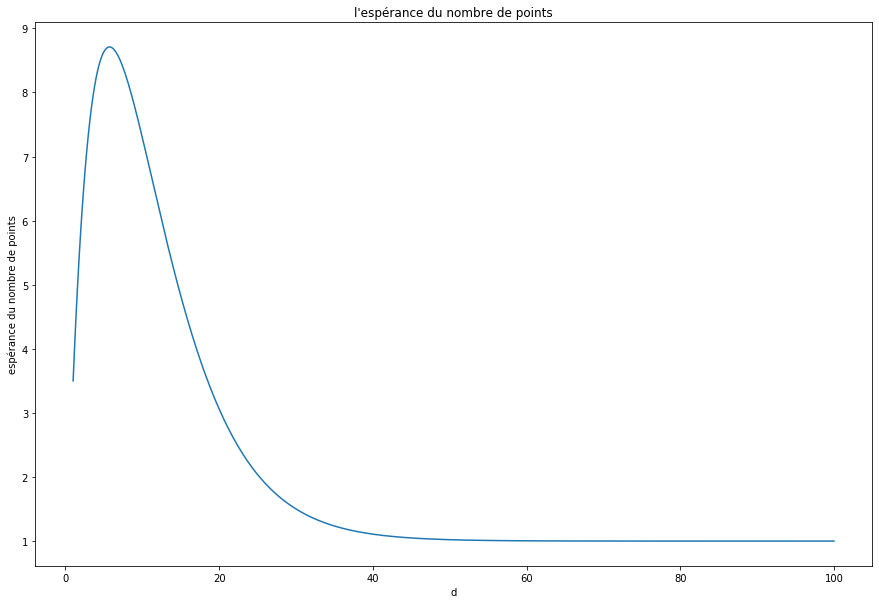

In [31]:
# traçons la courbe de l'espérance pour avoir une idée sur le comportement de la fonction
x = np.linspace(1, 100, 500)
esp = lambda d : ((4*d-1)*((5/6)**d))+1
plt.plot(x, esp(x))
plt.xlabel("d")
plt.ylabel("espérance du nombre de points")
plt.title("l'espérance du nombre de points")

* $ \text{Là on voit bien que la courbe à un maximum global précis}$ 

In [29]:
# calcule l'espérance du nombre de points si on utilise d dès à chaque tour
def espAveugle(d):
    return ((4*d-1)*((5/6)**d))+1

In [30]:
# calclue la valeur de D qui maximise l'espérance du nombre de points
def maxD (D):
    # on intialise le maximum à 0 
    maxEsp=0  
    # pour chaque d entre 1 et D on calcule l'espérance
    for i in range (1,D+1):
        # si cette espérance est superieure à l'espérance maximale on met à jour l'espérance maximale 
        #et on garde le d associé
        if (espAveugle(i) > maxEsp):
            maxEsp=espAveugle(i)
            maxInd=i
    return maxInd  

In [32]:
#testons pour des valeurs différentes 
print(maxD(100))
print(maxD(4))

6
4


### $\text{Implémentation de la stratégie aveugle}$

* $\text{La stratégie consiste à lancer d dès telque d  maximise l'espérance du nombre de points }$

In [9]:
# la stratégie aveugle renvoi la valeur de D optimale
def strategieAveugle(N,D):
    return maxD(D)

 ##  $\textit{4.2 Stratégie optimale}$

* $\text { Soit EG(i,j) l'espérance de gain du joueur 1 dans l'état (i,j) , en supposant que son adversaire et lui-même jouent de  façon optimale.}$<br>
$\text{ Pour cela on a fait deux varaintes d'algorithmes , le premier est itératif avec la formule de récursion suivante :}$

$$ EG(i,j) = \max_{d1=1}^{D}  \sum_{k1=1}^{6  D} P(d1,k1)
\left[  \min_{d2=1}^{D}  \sum_{k2=1}^{6  D} P(d2,k2) \times EG(i+k1,j+k2)   \right]  $$

In [12]:
# calcule la matrice des espérances des gains pour D et N données, VERSION ITÉRATIVE 
def espDynamiqueIter(D,N):
    #On calcule la matrice des probabilités P(d,k) : probabiliité de gagner k points en jettant d dès
    p=P(D)
    
    # initialisation de la matrice des espérances de gain par des nan (not a number) \
    #pour qu'on soit sur qu'on est entraine d'utiliser des valeurs déja calculés lors de la récursion
    esp=np.zeros((N+6*D,N+6*D,2))
    esp=np.full_like(esp, np.nan)

    # les cas de base déja expliqué dans le rapport 
    for i in range(N,N+6*D):
        esp[:,i,0]=-1
    for i in range(N,N+6*D):
        esp[i,:,0]=1
    
    # la boucle de récursion : on commance par le coin droit-bas de matrice ( backward )
    
    for i in range(N-1,-1,-1):
        for j in range(N-1,-1,-1):
            # pour chaque case (i,j) on cherche d qui maximise l'espérance de gain du joueur 1
            maxEspGainJ1=-math.inf
            dOptJ1=99
            # pour tous les d possible on calcule l'espérance du joueur 1
            for d1 in range(1,D+1):
                # on calcule la somme de produit de l'espérance de joueur 1 avec la probabilité qui'il gagne k point avec d1 
                espGainJ1=0
                for k1 in range(1,6*D+1):
                    # on cherche le minimum que le joueur 1 peut gagner si le joueur 2 joue de façon optimale lui aussi 
                    minEspGainJ2=math.inf  
                    # pour tous les d possible on calcule l'espérance du joueur 2
                    for d2 in range(1,D+1):
                        espGainJ2=0
                        for k2 in range(1,6*D+1):
                            espGainJ2+=esp[i+k1,j+k2,0]*p[d2,k2]
                        if(espGainJ2<minEspGainJ2):
                            minEspGainJ2=espGainJ2
                    espGainJ1+=minEspGainJ2*p[d1,k1]
               # si le nouveau gain est meilleur que le gain maximale alors on met le gain maximale à jour et on sauvgarde le d associé
                if (espGainJ1>maxEspGainJ1):
                    maxEspGainJ1=espGainJ1
                    dOptJ1=d1

            esp[i,j,0]=maxEspGainJ1
            esp[i,j,1]=dOptJ1
    return esp   

* $\text{Afin d'éviter les boucles imbriquées, on peut transformer la formule précedente en utilisant le faite que le jeu est à somme nulle.} $<br>$\text{La formule devient : }$
$$ EG(i,j) = - \min_{d=1}^{D}  \sum_{k=1}^{6  D} P(d,k).EG(j,i+k) $$


* $\text{ Pour cette formule, un algorithme récursif est meilleur car on ne connait pas un ordre de remplissage des cases possible }$

In [13]:
# calcule la matrice des espérances des gains pour D et N données, VERSION ITÉRATIVE 
def espDynamiqueRec(i,j,N,D,memo):
    # les cas de bases:
    # si la valeur est déja calculée on la renvoie
    if (not math.isnan(memo[i,j][0])):
        return memo[i,j]
    # si le joueur 1 a déja gagné
    if(i>=N and i>=j):
        return (1,1)
    # si le joueur 2 a déja gagné
    if (j>=N and j>i):
        return (-1,1)
    
    # on calcule la matrice des probabilté qu'on gagne k points en jettant d dès 
    p=P(D)
    
    #on initialise le gain minimal à + infinie
    gainMinimal=math.inf
    # pour tous les d de 1 à D on calcule le gain
    for d in range(1,D+1):
        gain=0
        for k in range(1,6*D+1):
            gain+=p[d,k]*espDynamiqueRec(j,i+k,N,D,memo)[0]
        # si le gain calculé est meilleur que le gain minimal alors on met à jour le gain minimal et on garde le d associé
        if (gain<gainMinimal):
            gainMinimal=gain
            dopt=d
    memo[i,j]=(-gainMinimal,dopt)
    return (-gainMinimal,dopt)

### $\text{Implémentation de la stratégie optimale}$

* $\text{La stratégie consiste à lancer d dès telque d  maximise l'espérance de gain pour l'état courant }$

In [78]:
# la stratégie optimal renvoi la valeur de D optimale
def strategieOptimale(N,D):
    # la matrice memo contient les valeur déja calculées
    memo = np.empty((N+6*D,N+6*D,2))
    # la matrice res contient le d optimal pour chaque état (i,j)
    res=np.empty((N+1,N+1))
    # initialisons les valeurs à nan pour qu'on soit sur qu'on utilise pas des valeurs interdites 
    memo[:]=np.nan
    res[:]=np.nan
    
    #on remplit la matrice des d optimaux 
    for i in range(N,-1,-1):
        for j in range(N,-1,-1): 
            res[i,j]=espDynamiqueRec(i,j,N,D,memo)[1]
    return res

## $\textit{Stratégie aléatoire}$

* $\text{La stratégie consiste à lancer d dès , telque d est tiré aléatoirement entre 1 et D à chaque fois}$

In [79]:
def strategieAleatoire(N,D):
    return random.randint(1,D)

## $\textit{Stratégie gourmande}$

* $\text{La stratégie consiste à lancer le nombre maximale de dès à chaque tour}$

In [80]:
def strategieGourmande(N,D):
    return D

 ##  $\textit{4.3 Partie expérimentale}$

* $\text{On simule des parties entre des joueurs qui utilisent les stratégies déja implémenter afin d'évaluer les stratégies.}$<br>
$\text{À chaque tour on calcule d ( le nombre de dès à lancer) à l'aide de la stratégie utilisée , après on tire d valeurs entières entre 1 et 6 } $<br>$ \text{si un dès tombe à 1 le gain est égale 1 , la somme des différentes valeurs des dès sinon }$


In [81]:
#Dictionnaire des stratégies déja implémantées
strategies = {"aveugle" :strategieAveugle,
           "optimale" : strategieOptimale,
           "aleatoire" : strategieAleatoire,
              "gourmande": strategieGourmande,
              "optsim": strategie_mixte_optimale_dynaique
}

In [18]:
#Expérimenter la stratégie st1 contre la stratégie st2 , trace le gain cumulé de chaque joueur
def experience(st1,st2,N,D):
    # nombre de parties que les joueurs vont jouer
    nb_partie=100
    # le gain de joueur 1 initialement = 0
    g1=0
    # le gain de joueur 2
    g2=0
    # le gain obtenu pour le joueur 1 aprés chaque partie
    trace_j1=[]
    # le gain obtenu pour le joueur 2 aprés chaque partie
    trace_j2=[]
    # calcule des paramètres nécessaires pour chaque stratégie
    str1=strategies[st1](N,D)
    str2=strategies[st2](N,D)
    
    # pour chaque partie
    for i in range(nb_partie):
        # au début de chaque partie les gains sont nuls
        g1=0
        g2=0
        # tantque aucun joueur n'a arrivé à N , donc personne n'a gagné
        while((g1<N)and(g2<N)):
            # on calcule d en utilisant la stratégie  correspondante pour le joueur 1
            d1 = str1 if st1!="optimale" else str1[g1,g2]
            # on tire aléatoirement d1 valeurs entre 1 et 6
            res1=np.random.randint(1,7,int(d1))
            # s'il existe un dès à 1 le gain est incrémenté de 1 , sinon le gain est augmenté de la somme des valeurs tirée
            g1= (g1+1) if (res1.min()==1) else (g1+res1.sum())
            # si le joueur 1 arrive à N on sort ( c'est bon il a gagné)
            if (g1>=N):
                break
            # on calcule d en utilisant la stratégie  correspondante pour le joueur 1
            d2=str2 if st2!="optimale" else str2[g2,g1] # À revoir
            # on tire aléatoirement d2 valeurs entre 1 et 6
            res2=np.random.randint(1,7,int(d2))
            # s'il existe un dès à 1 le gain est incrémenté de 1 , sinon le gain est augmenté de la somme des valeurs tirée
            g2=  (g2+1) if (res2.min()==1) else (g2+res2.sum())
        # si c'est le joueur 1 qui gagné alors on ajoute 1 dans sa trace et -1 dans la trace du joueur 2
        if (g1>=N):
            trace_j1.append(1)
            trace_j2.append(-1)
        # si c'est le joueur 2 qui gagné alors on ajoute 1 dans sa trace et -1 dans la trace du joueur 1
        else:
            trace_j1.append(-1)
            trace_j2.append(1)
    trace_j1=np.array(trace_j1)
    trace_j2=np.array(trace_j2)
    # on trace les courbes des gains cumulés pour les deux joueurs
    plt.title("Simulation J1: "+st1+" J2: "+st2+" N= "+str(N)+" D= "+str(D))
    plt.plot(np.arange(nb_partie),trace_j1.cumsum(), label="gain joueur 1")
    plt.plot(np.arange(nb_partie),trace_j2.cumsum(), label="gain joueur 2")
    plt.legend()
    plt.show()


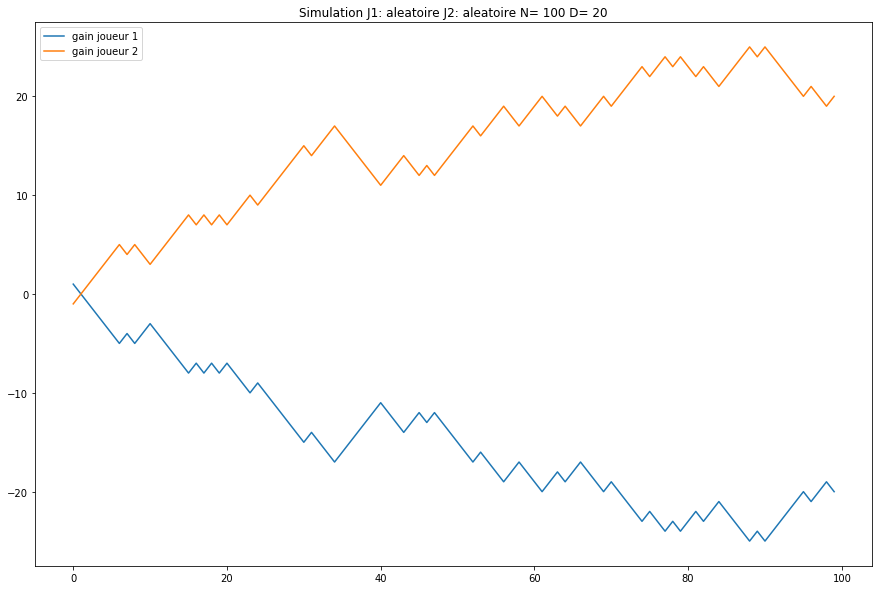

In [22]:
experience("aleatoire","aleatoire",100,20)

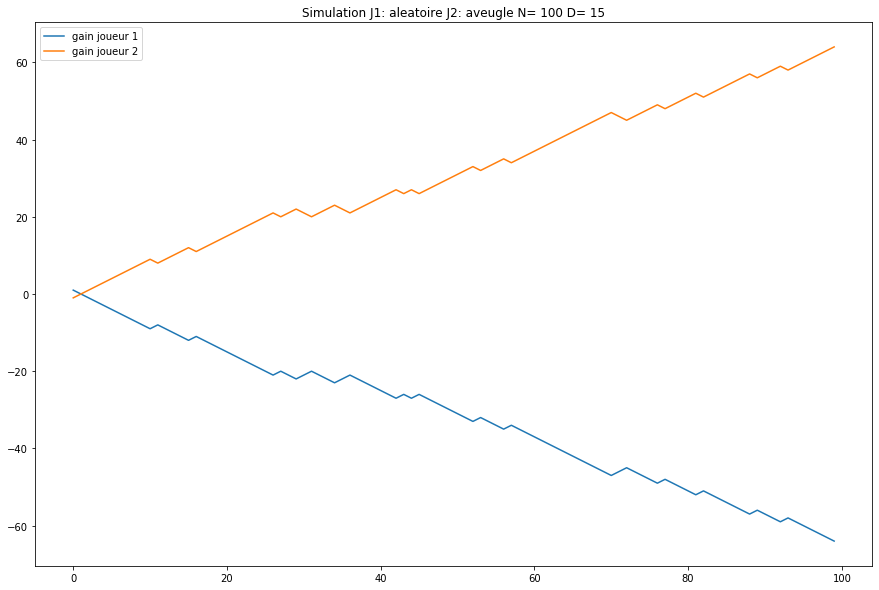

In [23]:
experience("aleatoire","aveugle",100,15)

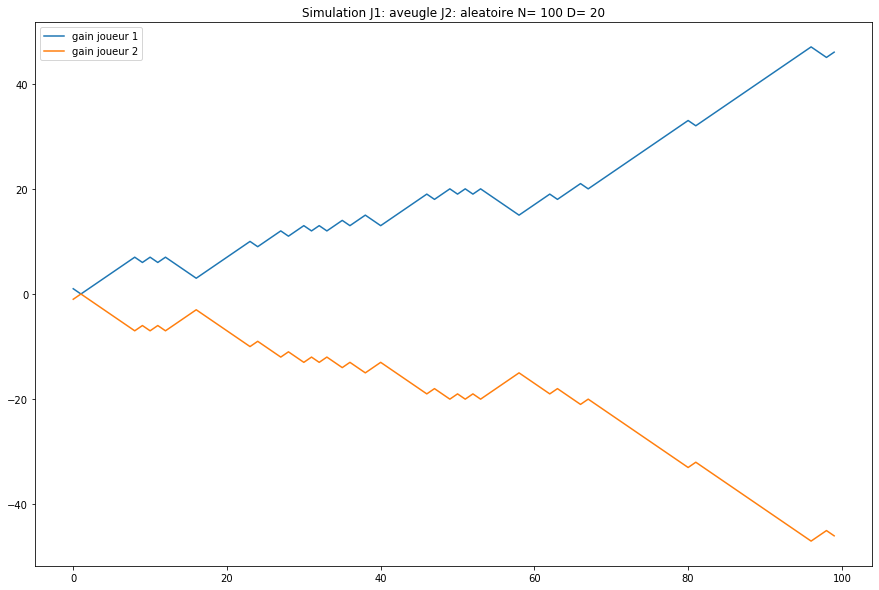

In [24]:
experience("aveugle","aleatoire",100,20)

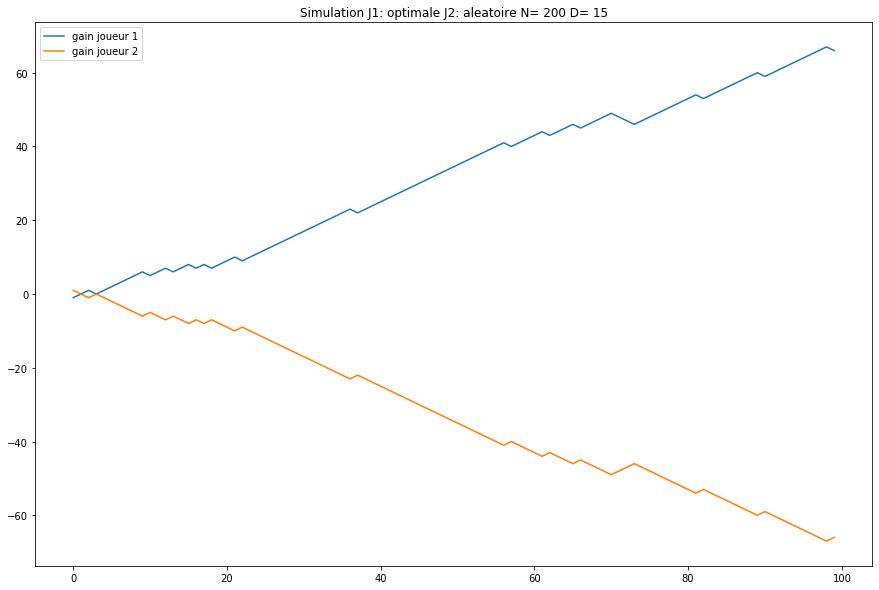

In [27]:
experience("optimale","aleatoire",200,15)

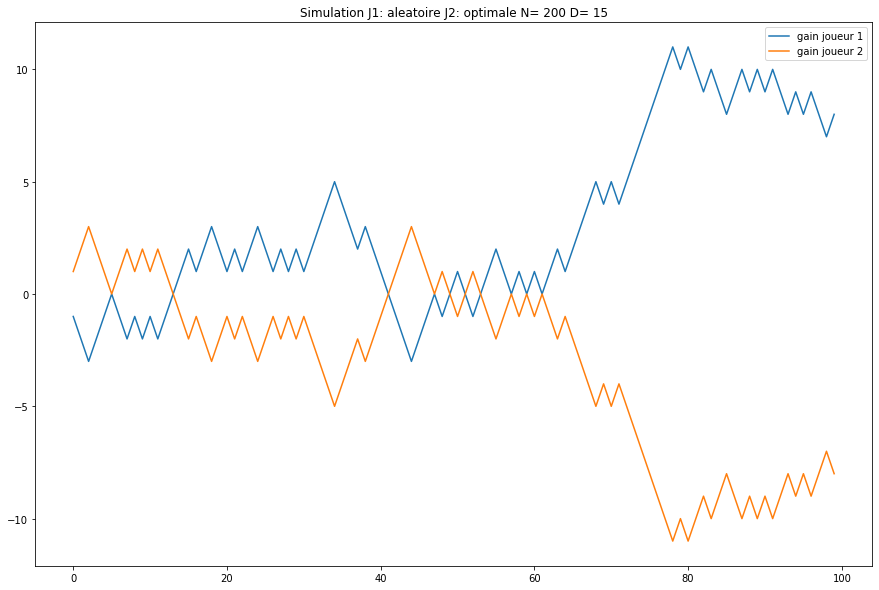

In [28]:
experience("aleatoire","optimale",200,15)

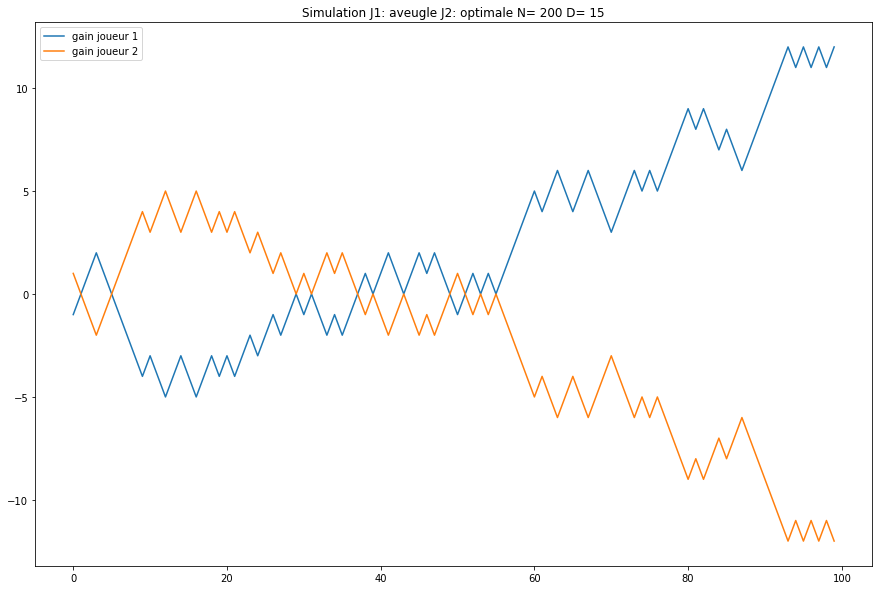

In [29]:
experience("aveugle","optimale",200,15)

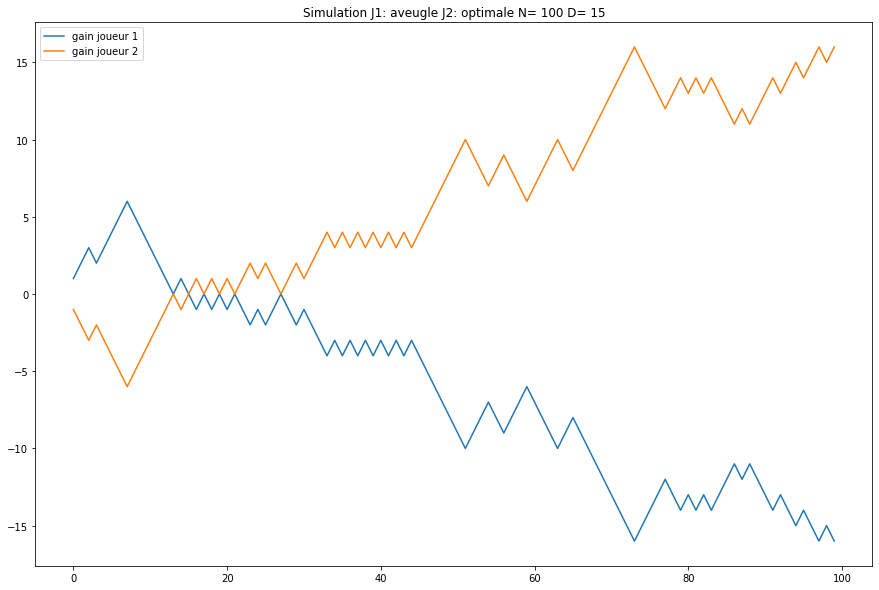

In [30]:
experience("aveugle","optimale",100,15)

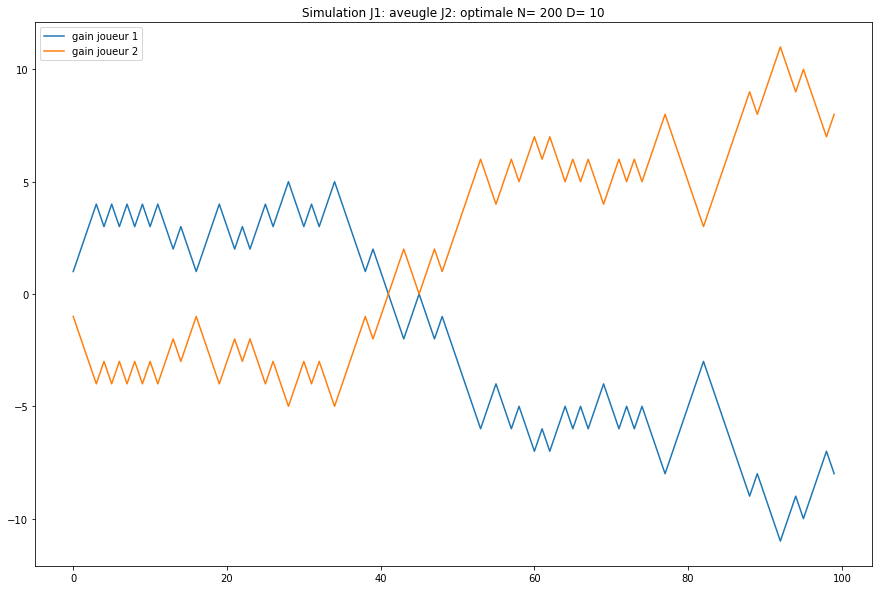

In [31]:
experience("aveugle","optimale",200,10)

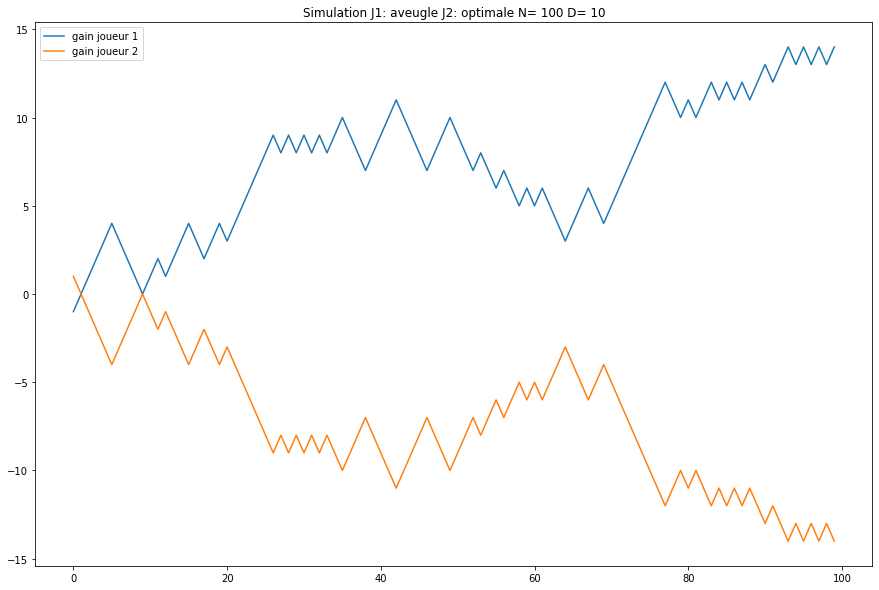

In [32]:
experience("aveugle","optimale",100,10)

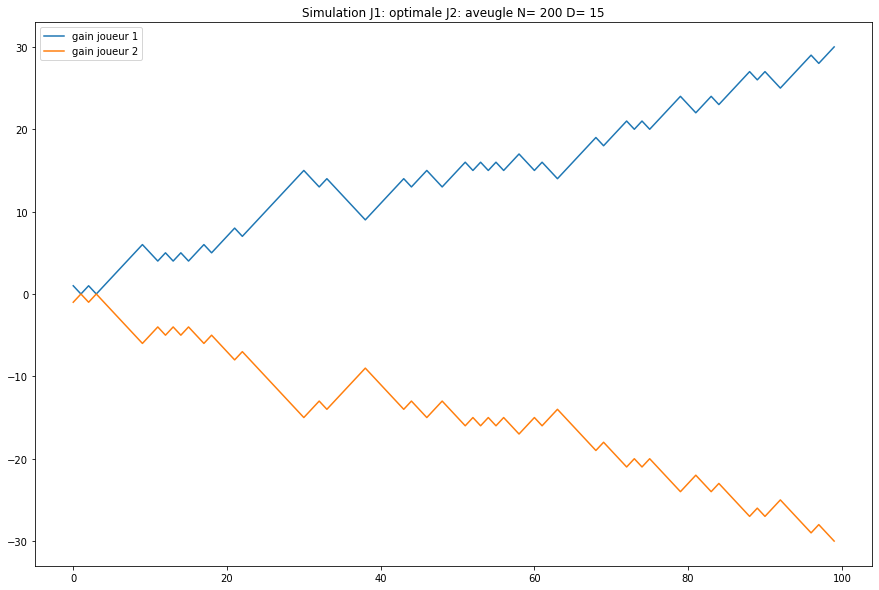

In [33]:
experience("optimale","aveugle",200,15)

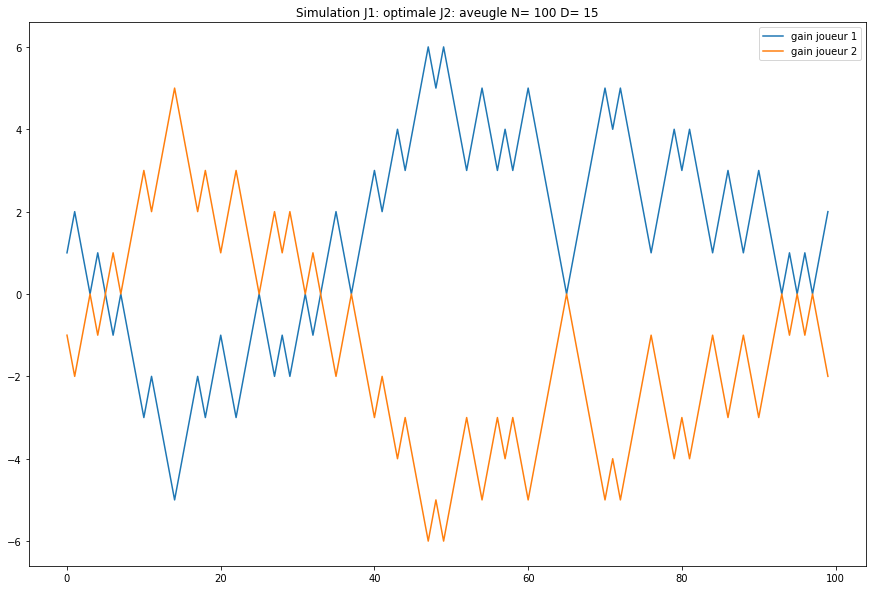

In [34]:
experience("optimale","aveugle",100,15)

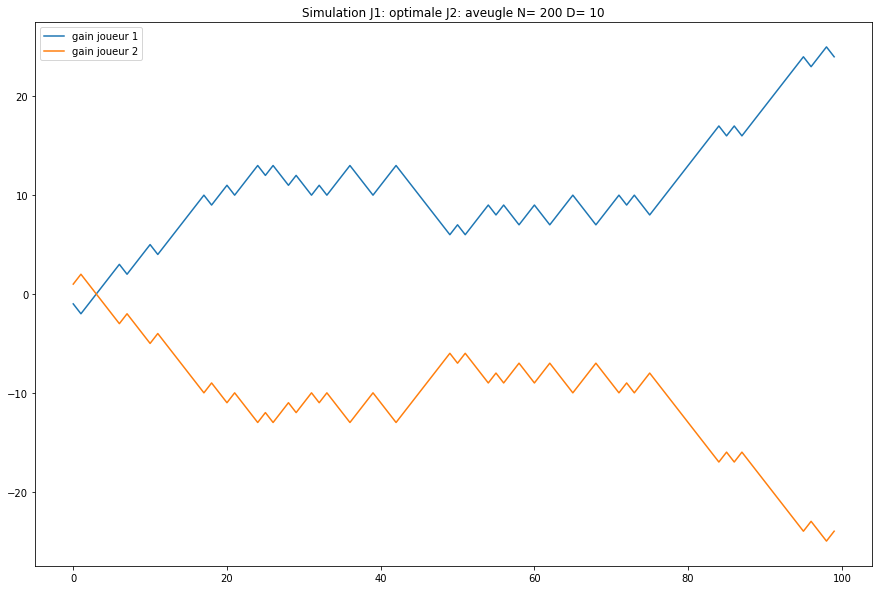

In [35]:
experience("optimale","gourmande",200,20)

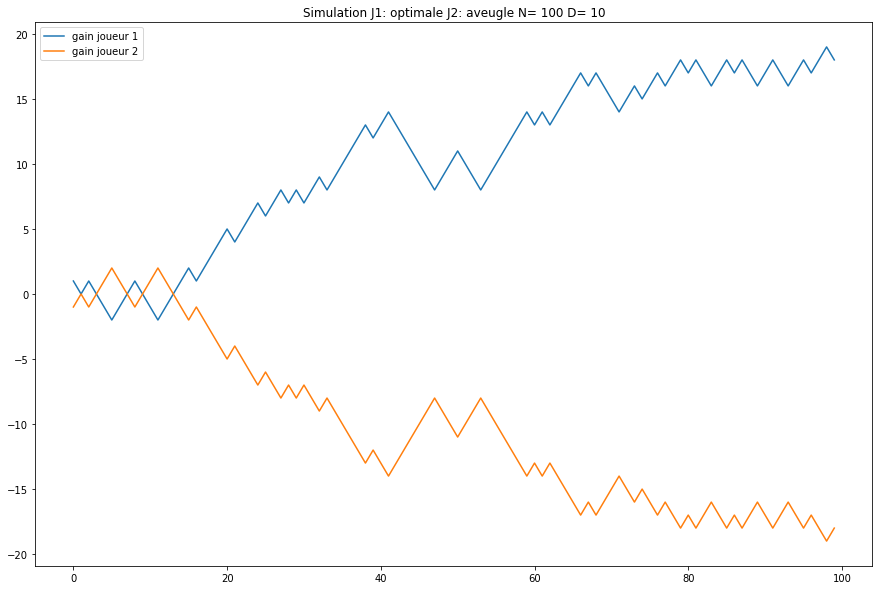

In [36]:
experience("optimale","aveugle",200,15)

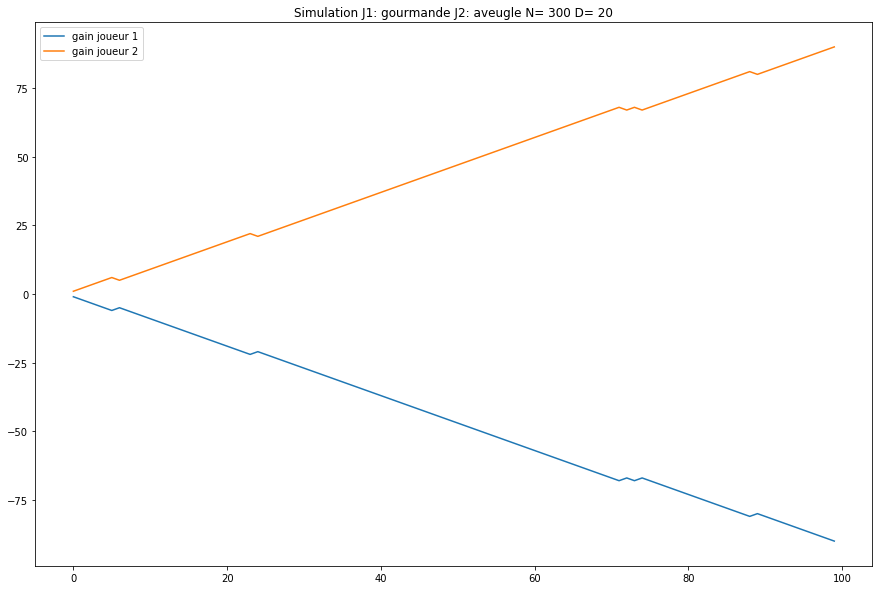

In [37]:
experience("gourmande","aveugle",300,20)

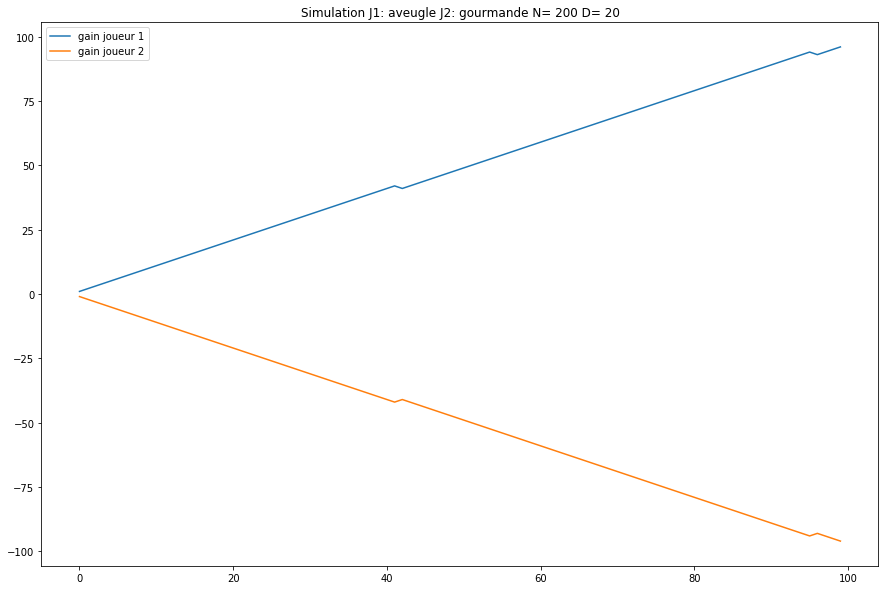

In [38]:
experience("aveugle","gourmande",200,20)

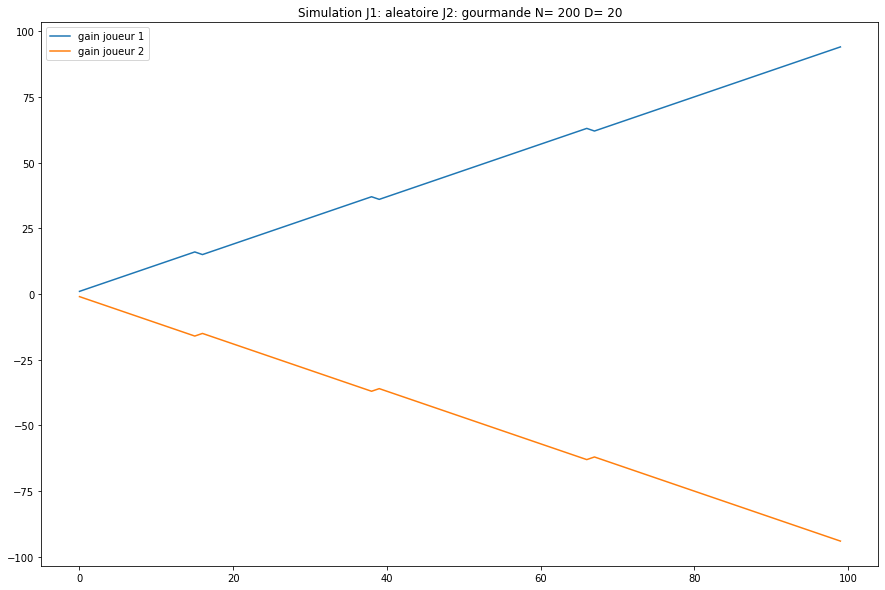

In [40]:
experience("aleatoire","gourmande",200,20)

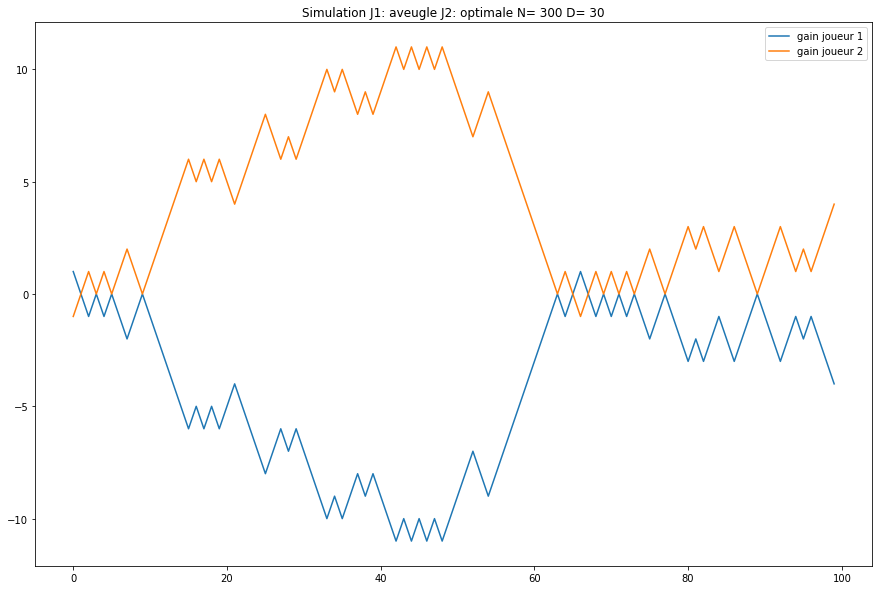

In [41]:
experience("aveugle","optimale",300,30)

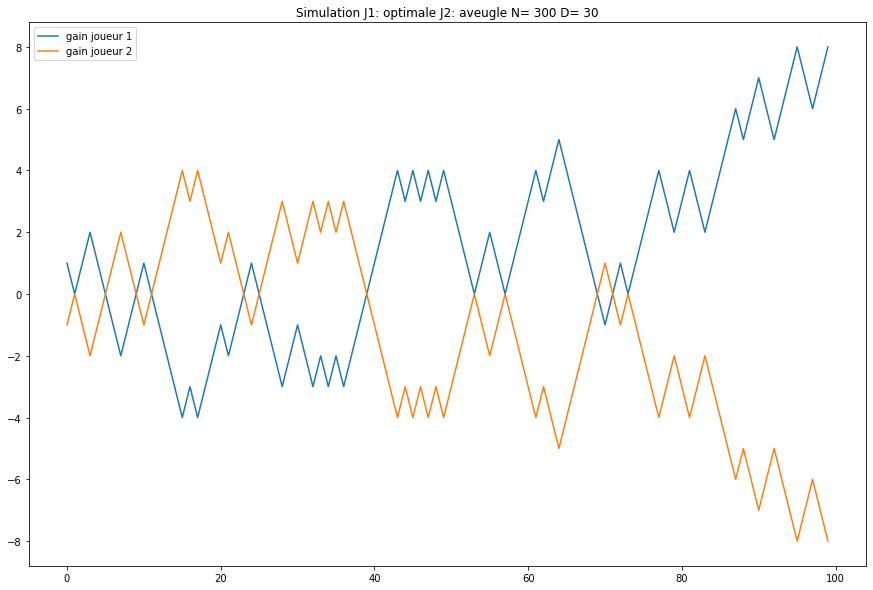

In [42]:
experience("optimale","aveugle",300,30)

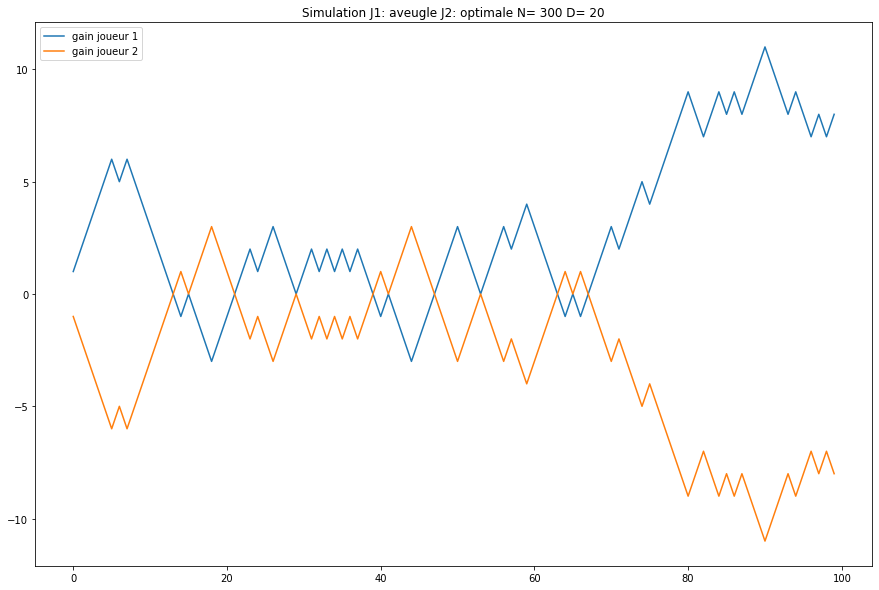

In [43]:
experience("aveugle","optimale",300,20)

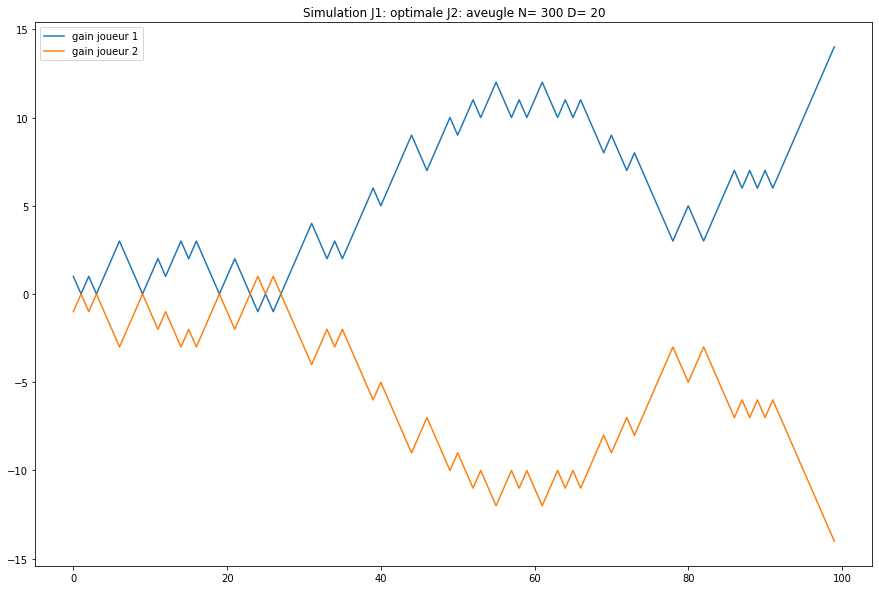

In [44]:
experience("optimale","aveugle",300,20)

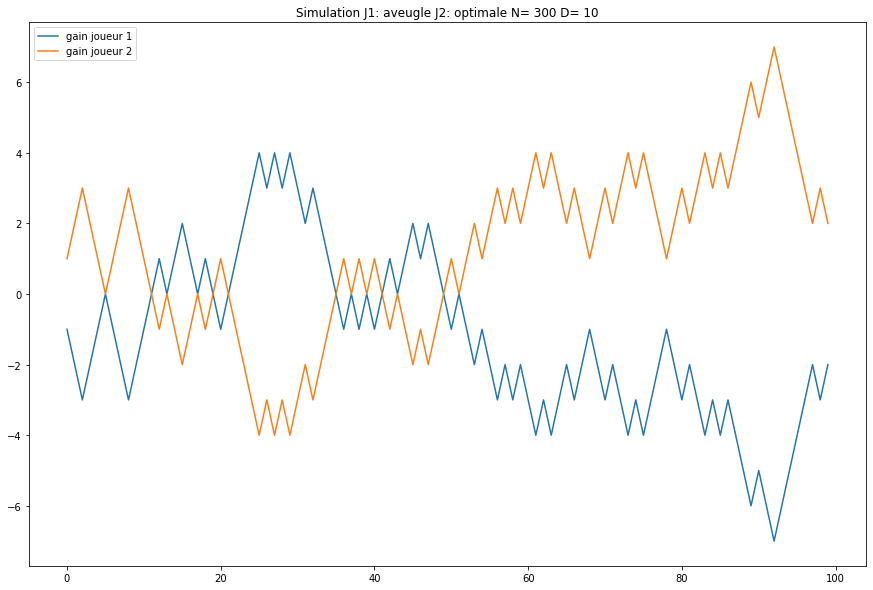

In [45]:
experience("aveugle","optimale",300,10)

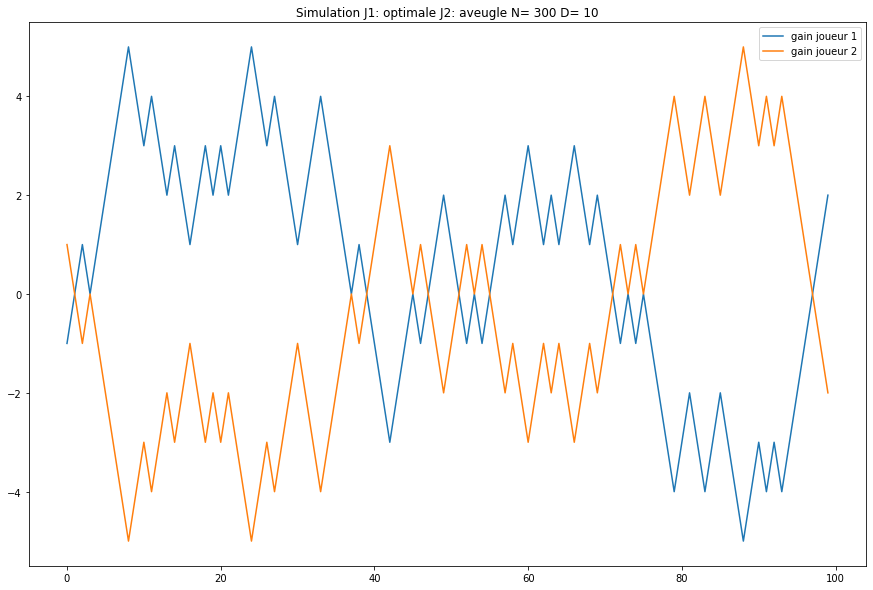

In [46]:
experience("optimale","aveugle",300,10)

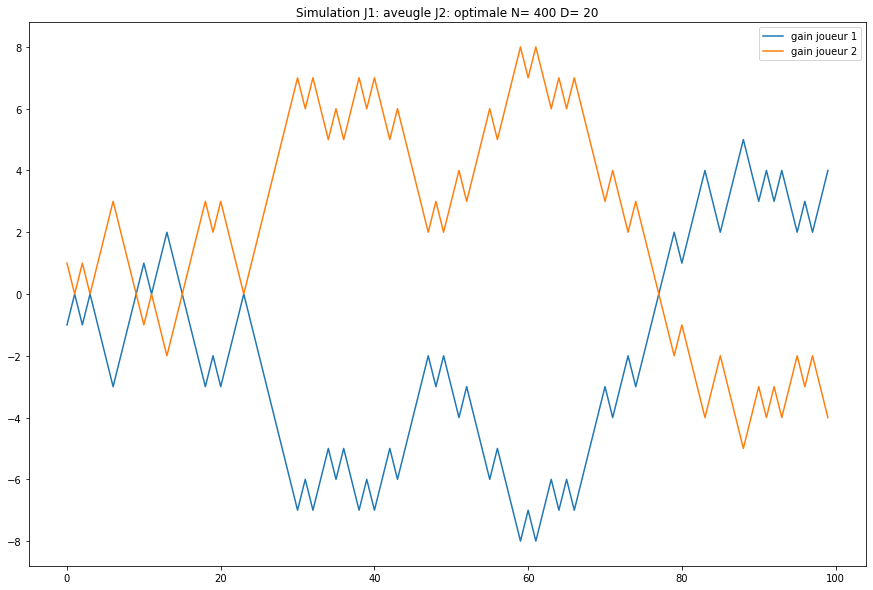

In [47]:
experience("aveugle","optimale",400,20)

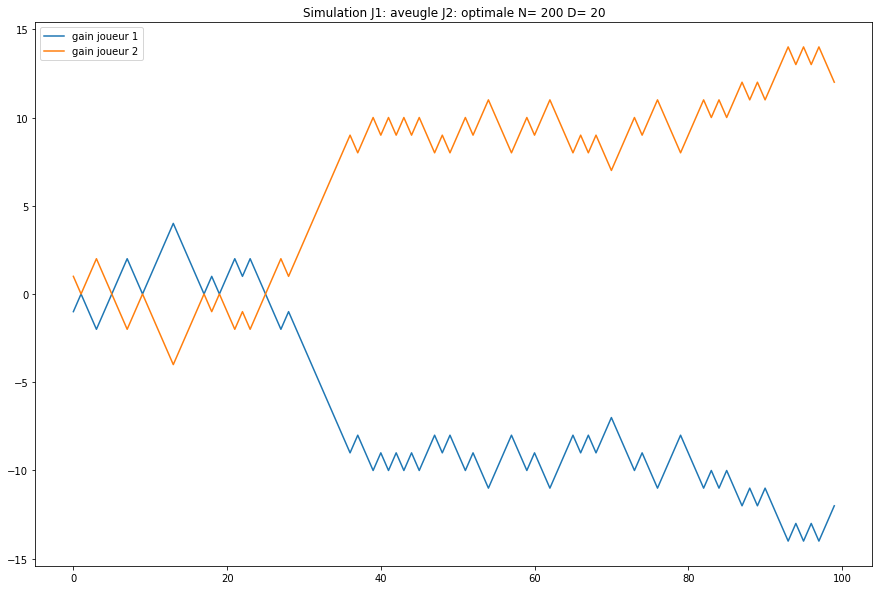

In [48]:
experience("aveugle","optimale",200,20)

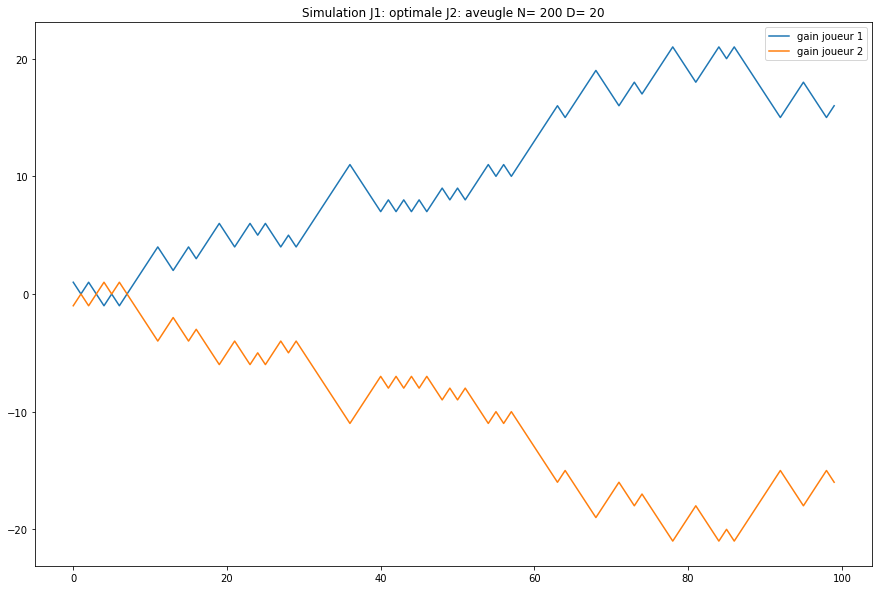

In [49]:
experience("optimale","aveugle",200,20)

#  $ \textit{5- Variante simultanée :}$

## $ \textit{5.1 Jeu en un coup :} $

### $\textit{Calcul de  $EG_1(d_1,d_2)$ en fonction des probabilités   P(d,k) }$:
> La fonction calcule l'espérance de gain du joueur 1 pour un certain $D$, selon la formule : <br>
* Pour $d_1$ et $d_2$ fixées : 
$$EG_1(d_1,d_2) =1 \times P(joueur \; 1 \; gagne) + 0 \times P(ex \; aequo) -1 \times P(joueur \; 2
\; gagne)= \sum_{k_1 = 1}^{6 \times d_1}{\sum_{k_2 = 1}^{k_1}{P(d_1,k_1) \times P(d_2,k_2)}} - \sum_{k_2 = 1}^{6 \times d_2}{\sum_{k_1 = 1}^{k_2}{P(d_2,k_2) \times P(d_1,k_1)}}$$

In [33]:
def esperance_gain_j1(D):
    "La fonction calcule l'espérance de gain du joueur 1 pour un certain D"
    # step1 : initialisation
    
    # on recupère les P(d, k)
    p=P(D)
    # on intialise la matrice des espérance de gain du joueur 1 de taille (D)x(D)
    # (D+1) x (D+1) :  puisque d commence de 1 (une ligne et une colonne non utilisées)
    eg = np.zeros((D+1,D+1))
    # on met à nan la ligne et la colonne non utilisées
    eg[0,:] = np.nan
    eg[:,0] = np.nan
    
    # step2 : remplissage
    
    # pour chaque d1 et pour chaque d2
    for d1 in range(1,D+1):
        for d2 in range(1,D+1):
            # premier terme de la formule P(joueur 1 gagne)
            gain = 0
            for k1 in range(1,6*d1+1):
                # k2 strictement inférieur au k1
                for k2 in range(1,k1):
                    gain += p[d1,k1]*p[d2,k2]
            # deuxième terme de la formule P(joueur 2 gagne)
            loss = 0
            for k2 in range(1,6*d2+1):
                # k1 strictement inférieure au k2
                for k1 in range(1,k2):
                    loss += p[d1,k1]*p[d2,k2]
            # on applique la formule
            eg[d1,d2] = gain - loss
    return eg

#### $\textit{Exemple pour D=3 : }$

In [34]:
D = 3
eg = esperance_gain_j1(D)

print("-Pour D =",D,", la matrice EG_1 : \n",eg)

# verifions que EG(i,j) = -EG(j,i)
# en sommant ces deux derniers on devra trouver 0
somme = 0
for d1 in range(1,D+1):
        for d2 in range(1,D+1):
            somme += eg[d1,d2] + eg[d2,d1]
print("-La somme des  EG(i,j) et des EG(j,i) = ",somme)


-Pour D = 3 , la matrice EG_1 : 
 [[        nan         nan         nan         nan]
 [        nan  0.         -0.375      -0.22685185]
 [        nan  0.375       0.         -0.19881687]
 [        nan  0.22685185  0.19881687  0.        ]]
-La somme des  EG(i,j) et des EG(j,i) =  0.0


### $\textit{Résolution du programme linéaire renvoyant la stratégie mixte optimale du joueur 1 :  }$

> On joue en un coup, quel est la stratégie mixte optimale du joueur 1 sachant que le joueur 2 la connaît et y répond optimalement. On doit résoudre le programme linéaire suivant :

\begin{equation}
\begin{aligned}
& \underset{P_1}{\text{max}}
& \underset{d_2}{\text{min}}
& \; \sum_{d_1=1}^{D}{EG_1(d_1, d_2) \times P_1^{d_1}} \\
& \text{s.c.} & &  \sum_{d_1=1}^{D} P_1^{d_1} =1 \\
& & &  P_1^{d_1}\geq 0, \; \forall d_1 \in \{1,..,D\}. \\
\end{aligned}
\end{equation}

> qui devient :

\begin{equation}
\begin{aligned}
& \underset{P_1}{\text{min}}
& & z \\
& \text{s.c.} & &  z-\sum_{d_1=1}^{D}{EG_1(d_1, d_2) \times P_1^{d_1}} \leq 0 & \forall   d_2 \in \{1,..,D\}.\\
& & &  \sum_{d_1=1}^{D} P_1^{d_1} =1 \\
& & &  z \in \mathbb{R}, P_1^{d_1}\geq 0, \; \forall d_1 \in \{1,..,D\}. \\
\end{aligned}
\end{equation}

### $\textit{En utilisant gurobi solver :  }$

In [112]:
"""
#!/usr/bin/python

# Copyright 2013, Gurobi Optimization, Inc.


from gurobipy import *
def un_coup_mixte_optimale(D):

    # D contraintes sur la minimalité et une contrainte pour les pi qui somment à 1
    nbcont = D + 1 
    # D variable pour les p_1(d_1) et z
    nbvar = D + 1

    # Range des variables et des contraintes
    lignes = range(nbcont)
    colonnes = range(nbvar)

    #******************* Matrice des contraintes ***********************
    
    # initialisation
    a = np.zeros((nbcont,nbvar))

    # matrice des esprerances de gains du joueur 1
    eg = esperance_gain_j1(D)

    # D premières contraintes exprimants la minimalité
    for d2 in range(1,D+1):
        # extraire la colonne (dans la matrice des espérances du j1) qui correspond au d_2 courant
        current = -eg[:,d2].T
        # coefficient de z est de 1 (nan avant)
        current[0] = 1
        a[d2-1,:] = current

    # contrainte exprimant la distribution de probabilité i.e. somme à 1
    a[D,:] = np.ones(D+1) #1 pour les pi
    a[D,0] = 0 # 0 pour la variable z

    #************************ Second membre ****************************
    b = np.zeros(D+1) # <= 0 pour la minimalité
    b[len(b)-1] = 1 # = 1 pour la somme à 1


    #******************** Coefficients de la fonction objectif *********************
    c = np.zeros(D+1) # les pi n'apparaissent pas dans la foction objectif
    c[0] = 1 # le z (fonction objectif = z)
    
    
    

    m = Model("un_coup_mixte_optimale") 

    #********************** declaration variables de decision ************************
    x = []
    for i in colonnes:
        if i==0:
            # la variable z est dans R
            x.append(m.addVar(vtype=GRB.CONTINUOUS, name="z"))
        else:
            # les pi sont >= 0
            x.append(m.addVar(vtype=GRB.CONTINUOUS, lb=0, name="p%d" % (i)))

    # maj du modele pour integrer les nouvelles variables
    m.update()

    obj = LinExpr();
    obj =0
    for j in colonnes:
        obj += c[j] * x[j]

    # definition de l'objectif
    m.setObjective(obj,GRB.MAXIMIZE)

    #************************* Definition des contraintes **************************
    for i in lignes:
        if (i == D):
            # contrainte exprimant la somme à 1
            m.addConstr(quicksum(a[i][j]*x[j] for j in colonnes) == b[i], "Contrainte%d" % i)
        else:
            # contraintes exprimant la minimalité
            m.addConstr(quicksum(a[i][j]*x[j] for j in colonnes) <= b[i], "Contrainte%d" % i)

    # Resolution
    m.optimize()

    print("")                
    print('Solution optimale:')
    result = np.zeros(D+1)
    for j in colonnes:
        result[j] = x[j].x
        if j==0 :
            print('z', '=', x[j].x)
        else:
            print('p%d'%(j), '=', x[j].x)
    print("")
    print('Valeur de la fonction objectif :', m.objVal)
    return result
"""  
print("en commentaire car gurobi n'est pas disponible hors la salle 14-15 303")

en commentaire car gurobi n'est pas disponible hors la salle 14-15 303


In [60]:
# exemple en utilisant gurobi solver avec D=22
"""
sauv = un_coup_mixte_optimale(22)
print(sauv)
"""

Optimize a model with 23 rows, 23 columns and 506 nonzeros
Coefficient statistics:
  Matrix range     [2e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 23 rows, 23 columns, 506 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+30   2.200000e+31   1.000000e+00      0s
       9   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.02 seconds
Optimal objective -0.000000000e+00
[0.         0.         0.17558046 0.05293751 0.         0.77148204
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [64]:
# gurobi solver n'étant pas toujours disponible on stocke les résultats dans un fichier texte 
# que nous pourrons invoquer à volonté
"""
file1 = open("solution_prog_lin.txt","a")  
for d in range(2,20):
    file1.write("d = "+str(d)+" "+str(un_coup_mixte_optimale(d).tolist())+"\n")
file1.close()
file1 = open("solution_prog_lin.txt","r")  
result_general_gurobi =  file1.readlines() 
file1.close()
"""

Optimize a model with 3 rows, 3 columns and 6 nonzeros
Coefficient statistics:
  Matrix range     [4e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective -0.000000000e+00
Optimize a model with 4 rows, 4 columns and 12 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 4 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds


Coefficient statistics:
  Matrix range     [2e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 18 rows, 18 columns, 306 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+30   1.700000e+31   1.000000e+00      0s
       9   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.02 seconds
Optimal objective -0.000000000e+00
Optimize a model with 19 rows, 19 columns and 342 nonzeros
Coefficient statistics:
  Matrix range     [2e-03, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s
Presolved: 19 rows, 19 columns, 342 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+30   1.800000e+31   1.000000e+00      0s
       9   -0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and

### $\textit{En utilisant scipy.optimize.linprog :  }$
> Gurobi solver n'étant pas toujours disponible on peut utiliser scipy.optimize.linprog qui permet de résoudre des programmes linéaires :

In [35]:
# en utilisant scipy.optimize.linprog
# doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html
import scipy
from scipy import optimize
def un_coup_mixte_optimale(D,eg):


    # D contraintes sur la minimalité et une contrainte pour les pi qui somment à 1
    nbcont = D + 1 
    # D variable pour les p_1(d_1) et z
    nbvar = D + 1

    # Range des variables et des contraintes
    lignes = range(nbcont)
    colonnes = range(nbvar)

    #******************* Matrice des contraintes qui expriment la minimalité ***********************
    
    # initialisation
    a_ub = np.zeros((nbcont-1,nbvar))

    # matrice des esprerances de gains du joueur 1
    # eg = esperance_gain_j1(D)

    # D premières contraintes exprimants la minimalité
    for d2 in range(1,D+1):
        # extraire la colonne qui correspond au d_2 courant depuis la matrice des esprerances de gains du joueur 1
        current = -eg[:,d2].T
        # coefficient de z (nan avant)
        current[0] = 1
        a_ub[d2-1,:] = current
    #print(a_ub)
    
    #******************* Matrice de la contrainte qui exprime la somme à 1***********************
    
    # contrainte exprimant la distribution de probabilité i.e. somme à 1
    # initialisation
    a_eq = np.zeros((1,nbvar))
    a_eq[0,:] = np.ones(D+1) # les pi
    a_eq[0,0] = 0 # la variable z
    #print(a_eq)

    #************************ Second membre ****************************
    
    b_ub = np.zeros(D) # minimalité (unequality constraints)
    #print(b_ub)
    b_eq = np.ones(1) # somment à 1 (equality constraints)
    #print(b_eq)


    #******************** Coefficients de la fonction objectif *********************
    c = np.zeros(D+1) # les pi n'apparaissent pas dans la foction objectif
    c[0] = -1 # le z (fonction objectif = z)(-1 puisque on minimise avec scipy.optimize.linprog )
    #print(c)
    #*************************** bounds ********************************************
    
    bounds = []
    # z est dans R
    bounds.append((None,None))
    # les pi sont >= 0
    for i in range(D):
        bounds.append((0,None))
    result = scipy.optimize.linprog(c, a_ub, b_ub, a_eq, b_eq, bounds, method = "revised simplex")

    return result["x"]

#### $\textit{-Test avec D = 5 :  }$

In [36]:
strategie_mixte = un_coup_mixte_optimale(5,esperance_gain_j1(5))
strategie_mixte = np.delete(strategie_mixte,0) # le prmier élement correspond à z
print("La strtégie mixte optimale du joueur 1 est de : ", strategie_mixte)
# mêmes résultats que le gurobi solver

La strtégie mixte optimale du joueur 1 est de :  [0.         0.17558046 0.05293751 0.         0.77148204]


#### $\textit{-Vérifions que le programme linéaire renvoie bien une stratégie optimale :}$
> Pour ce faire on va :
* Pour un D fixé :
    * récuperer la strtégie mixte optimale du joueur 1 que renvoie le programme : $P_1$
    * récuperer la réponse optimale du joueur 2 face à cette stratégie mixte i.e. :  $ \underset{d_2}{\text{argmin}} \sum_{d_1=1}^{D}{EG_1(d_1, d_2) \times P_1^{d_1}}$
    * s'assurer que l'espérance de gain optimale du joueur 2 face à cette stratégie mixte $\sum_{d_1=1}^{D}{-EG_1(d_1, d_2^{opt}) \times P_1^{d_1}}$ est au plus 0 (ex aequo)

In [37]:
# verifcation : 
import math
for D in range(1, 15):
    # step1 : stratégie mixte optimale du joueur 1
    P1 = un_coup_mixte_optimale(D,esperance_gain_j1(D))
    # la valeur de la fonction objectif (z)
    z = P1[0]
    P1 = np.delete(P1, 0) # premier élement correspond à z
    eg = esperance_gain_j1(D)
    
    # step2 : réponse optimale du joueur 2
    # initialisations
    argmax_local = 1
    max_local = -math.inf
    # tout les d_2 sont des condidats potentiels
    for d2 in range(1,D+1):
        current = -eg[:,d2].T # - car jeu à somme nulle
        current = np.delete(current, 0)
        esp2 = np.dot(P1, current) # on calcul la somme
        # mise à jour du maximum
        if esp2 > max_local:
            max_local = esp2
            argmax_local = d2
    print("-Pour D = ",D," : ")
    print("J1 joue selon : ", P1)
    print("La réponse optimale de J2 est : ", argmax_local, " lui garantissant une espérance de : ", max_local)

-Pour D =  1  : 
J1 joue selon :  [1.]
La réponse optimale de J2 est :  1  lui garantissant une espérance de :  -0.0
-Pour D =  2  : 
J1 joue selon :  [0. 1.]
La réponse optimale de J2 est :  2  lui garantissant une espérance de :  0.0
-Pour D =  3  : 
J1 joue selon :  [0. 0. 1.]
La réponse optimale de J2 est :  3  lui garantissant une espérance de :  0.0
-Pour D =  4  : 
J1 joue selon :  [0. 0. 0. 1.]
La réponse optimale de J2 est :  4  lui garantissant une espérance de :  0.0
-Pour D =  5  : 
J1 joue selon :  [0.         0.17558046 0.05293751 0.         0.77148204]
La réponse optimale de J2 est :  5  lui garantissant une espérance de :  1.3444106938820255e-17
-Pour D =  6  : 
J1 joue selon :  [0.         0.17558046 0.05293751 0.         0.77148204 0.        ]
La réponse optimale de J2 est :  5  lui garantissant une espérance de :  1.3444106938820255e-17
-Pour D =  7  : 
J1 joue selon :  [0.         0.17558046 0.05293751 0.         0.77148204 0.
 0.        ]
La réponse optimale de J2 

### $\textit{Comparaison expérimentale de la statégie mixte optimale avec la stratégie aveugle :  }$

In [38]:
import random
def tirage(p):
    "tirage selon une loi de probabilité discréte"
    # on calcule la somme cumulée
    cumsumP = np.cumsum(p)
    # on tire un nombre aléatoirement entre 0 et 1
    alea = random.random()
    # on retourne l'indice du premier element supérieur a alea
    return np.argmax(cumsumP>alea)

In [39]:
def joueur_mixte_optimale_un_coup(D):
    "Renvoie le d qui correspond à la stratégie mixte optimale"
    # on récupère la stratégie mixte optimale
    P = un_coup_mixte_optimale(D,esperance_gain_j1(D))
    P = np.delete(P, 0) # on supprime le z
    return tirage(P)+1 # car d entre 1 et D

In [40]:
def simulation_aveugle_mixte_optimale_un_coup(D,n):
    "simule n parties entre un joueur aveugle et un joueur mixte optimale pour un D fixé"
    # on récupère les P(d,k)
    p = P(D)
    # on initialise le comptage du nombre de parties où gagne 1, où gagne 2 et où les deux sont ex aequo
    j1 = 0
    j2 = 0
    nul = 0
    for i in range(n):
        # le premier joueur tire son d selon la strtégie mixte optimale
        d1 = joueur_mixte_optimale_un_coup(D)
        # le deuxiéme joueur tire son d selon la stratégie aveugle
        d2 = strategieAveugle(0,D)
        
        # le premier joueur récupère son gain k1
        # il s'agit d'un tirage selon la loi multinomiale qui correspond à p(d1, :)
        k1 = tirage((p[d1,:])[1:6*d1+1])+1 # car k>=1
        # le deuxième joueur récupère son gain k1
        # il s'agit d'un tirage selon la loi multinomiale qui correspond à p(d2, :)
        k2 = tirage((p[d2,:])[1:6*d2+1])+1
        # le premier joueur gagne
        if (k1>k2):
            j1+=1
        # le deuxième joueur gagne
        elif (k1<k2):
            j2+=1
        # ex aequo
        else:
            nul+=1
    return j1,j2,nul

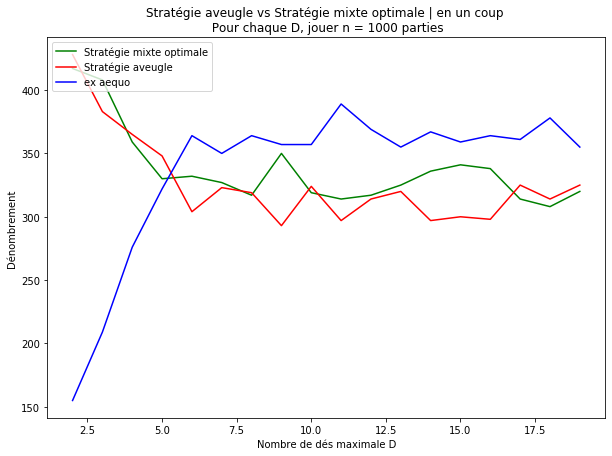

In [18]:
# on dessine les courbes
time = []
joueur1 = []
joueur2 = []
null = []
# nombre de parties à jouer pour chaque D
n = 1000
for D in range(2,20):
    time.append(D)
    # on joue n parties pour ce D
    triplet = simulation_aveugle_mixte_optimale_un_coup(D,n)
    # on met à jour le comptage
    joueur1.append(triplet[0])
    joueur2.append(triplet[1])
    null.append(triplet[2])
    
# dessin de la courbe :
fig = plt.figure(1, figsize=(10, 7))
plt.title("Stratégie aveugle vs Stratégie mixte optimale | en un coup \n Pour chaque D, jouer n = %d parties"%n)
plt.xlabel("Nombre de dés maximale D")
plt.ylabel("Dénombrement")
plt.plot(time, joueur1,color='g',label='Stratégie mixte optimale') 
plt.plot(time, joueur2, color='r', label ='Stratégie aveugle')
plt.plot(time, null, color='b', label ='ex aequo')
plt.legend(loc=2)
plt.show()

### $\textit{Analyse et commentaires :  }$

> Les courbes correspondent aux résultats précédents :
* avant D=4 : les deux joueurs jouent identiquement et donc les gains sont équivalents.
* pour D=5 : le joueur 1 joue sa stratégie mixte et le joueur aveugle y répond optimalement $d_2=5$.
* à partir de D=6 : le joueur 1 présente un avantage, effectivement la meilleure réponse du joueur 2 serait de jouer $d_2^{optimale} = 5$, or selon sa stratégie aveugle il va jouer $d_2^{aveugle} = 6$.

> <br> Le nombres de matchs nuls restent trés important.

## $ \textit{5.2 Cas général :} $

### $\textit{Calcul de  $E_1^{d_1,d_2}(i,j)$ en fonction des probabilités $P(d,k)$ et $de EG_1(i,j)$ :}$
On applique la formule :
	 	$$E_1^{d_1,d_2}(i,j) = \sum_{k_1 = 1}^{6d_1}{P(d_1, k_1) \times [\sum_{k_2 = 1}^{6d_2}{P(d_2, k_2) \times EG_1(i+k_1,j + k_2)] }} $$

In [68]:
def esp_d1_d2(D,i,j,EG_1):
    
    "La fonction calcule l'espérance de gain du joueur 1 dans l'état (i,j) pour un certain D"
    # step1 : initialisation
    
    # on recupère les P(d, k)
    p=P(D)
    # on intialise la matrice des espérance de gain du joueur 1 de taille (D)x(D)
    # (D+1) x (D+1) :  puisque d commence de 1 (une ligne et une colonne non utilisées)
    eg = np.zeros((D+1,D+1))
    # on met à nan la ligne et la colonne non utilisées
    eg[0,:] = np.nan
    eg[:,0] = np.nan
    
    # step2 : remplissage
    
    # pour chaque d1 et pour chaque d2
    for d1 in range(1, D+1):
        for d2 in range(1, D+1):
            # on applique la formule
            somme1 = 0
            for k1 in range(1, 6*d1+1):
                somme2 = 0
                for k2 in range(1, 6*d2+1):
                    somme2 += p[d2, k2] * EG_1[i+k1,j+k2]
                somme1 += p[d1, k1] * somme2
            eg[d1,d2] = somme1
    return eg

In [75]:
def strategie_mixte_optimale_dynaique(N,D):
    #On calcule la matrice des probabilités P(d,k) : probabiliité de gagner k points en jettant d dès
    p=P(D)
    
    # initialisation de la matrice des espérances de gain par des nan (not a number) 
    # pour qu'on soit sur qu'on est entrain d'utiliser des valeurs déja calculés lors de la récursion
    esp=np.zeros((N+6*D,N+6*D))
    esp=np.full_like(esp, np.nan)
    optimale = np.zeros((N,N,D))

    # les cas de base déja expliqué dans le rapport 
    for i in range(N,N+6*D):
        esp[:,i]=-1
    for i in range(N,N+6*D):
        esp[i,i]=0
    for i in range(N,N+6*D):
        for j in range(0,i):
            esp[i,j]=1
    # la boucle de récursion : on commance par le coin droit-bas de matrice ( backward )
    for i in range(N-1,-1,-1):
        for j in range(N-1,-1,-1):
            # on recuperer la matrice de l'esperance de gain du joueur 1 en cet état en fonction 
            # des differentes valeurs de d
            esp_d12 = esp_d1_d2(D,i,j,esp.copy())
            # pour chaque case (i,j) on cherche la strategie mixte optimale du joueur 1 :
            p_1 = un_coup_mixte_optimale(D,esp_d12)
            p_1 = np.delete(p_1,0) #on enleve la première case qui correspondà la variable z
            
            # On calcule la réponse optimale du deuxième joueur
            # initialisations
            argmax_local = 1
            max_local = -math.inf
            # tout les d_2 sont des condidats potentiels
            for d2 in range(1,D+1):
                current = -esp_d12[:,d2].T # - car jeu à somme nulle
                current = np.delete(current, 0) # nan avant
                esp2 = np.dot(p_1, current) # on calcul la somme
                # mise à jour du maximum
                if esp2 > max_local:
                    max_local = esp2
                    argmax_local = d2
                    
            # enfin on recupere la valeur de EG_1(i,j)
            current = esp_d12[:,argmax_local].T # correspond au d2 optimal
            current = np.delete(current, 0) # car nan avant
            esp[i,j] = np.dot(current,p_1) 
            
            # on sauvegarde le p_1 optimale
            optimale[i,j] = p_1
    return optimale

### $\textit{Exemple pour N=50 et D=4 :}$

In [88]:
exemple = strategie_mixte_optimale_dynaique(50,4)
print(exemple)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[2.77555756e-17 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
  ...
  [0.00000000e+00 

## $\textit{Expérimentation :}$

In [85]:
#Expérimenter la stratégie st1 contre la stratégie st2 , trace le gain cumulé de chaque joueur
def experience_simultanious(st1,st2,N,D):
    # nombre de parties que les joueurs vont jouer
    nb_partie=100
    # le gain de joueur 1 initialement = 0
    g1=0
    # le gain de joueur 2
    g2=0
    # le gain obtenu pour le joueur 1 aprés chaque partie
    trace_j1=[]
    # le gain obtenu pour le joueur 2 aprés chaque partie
    trace_j2=[]
    # calcule des paramètres nécessaires pour chaque stratégie
    str1=strategies[st1](N,D)
    str2=strategies[st2](N,D)
    
    # pour chaque partie
    for i in range(nb_partie):
        # au début de chaque partie les gains sont nuls
        g1=0
        g2=0
        # tantque aucun joueur n'a arrivé à N , donc personne n'a gagné
        while((g1<N)and(g2<N)):
            # on calcule d en utilisant la stratégie  correspondante pour le joueur 1
            if (st1!="optsim"):
                d1 = str1 if st1!="optimale" else str1[g1,g2]
            else:
                d1  =  tirage(str1[g1,g2])+1
            # on tire aléatoirement d1 valeurs entre 1 et 6
            res1=np.random.randint(1,7,int(d1))
            # s'il existe un dès à 1 le gain est incrémenté de 1 , sinon le gain est augmenté de la somme des valeurs tirée
            g1= (g1+1) if (res1.min()==1) else (g1+res1.sum())
            # on calcule d en utilisant la stratégie  correspondante pour le joueur 1
            if(st2!="optsim"):
                d2=str2 if st2!="optimale" else str2[g2,g1]
            else:
                d2 =  tirage(str2[g2,g1])+1
            # on tire aléatoirement d2 valeurs entre 1 et 6
            res2=np.random.randint(1,7,int(d2))
            # s'il existe un dès à 1 le gain est incrémenté de 1 , sinon le gain est augmenté de la somme des valeurs tirée
            g2=  (g2+1) if (res2.min()==1) else (g2+res2.sum())
        # si c'est le joueur 1 qui gagné alors on ajoute 1 dans sa trace et -1 dans la trace du joueur 2
        if(g1==g2):
            trace_j1.append(0)
            trace_j2.append(0)
        elif (g1>g2):
            trace_j1.append(1)
            trace_j2.append(-1)
        # si c'est le joueur 2 qui gagné alors on ajoute 1 dans sa trace et -1 dans la trace du joueur 1
        else:
            trace_j1.append(-1)
            trace_j2.append(1)
    trace_j1=np.array(trace_j1)
    trace_j2=np.array(trace_j2)
    print("Espérance de gain du joueur 1 :",trace_j1.sum()/len(trace_j1))
    print("Espérance de gain du joueur 2 :",trace_j2.sum()/len(trace_j2))
    # on trace les courbes des gains cumulés pour les deux joueurs
    plt.title("Simulation J1: "+st1+" J2: "+st2+" N= "+str(N)+" D= "+str(D))
    plt.plot(np.arange(nb_partie),trace_j1.cumsum(), label="gain joueur 1")
    plt.plot(np.arange(nb_partie),trace_j2.cumsum(), label="gain joueur 2")
    plt.legend()
    plt.show()


Espérance de gain du joueur 1 : 0.43
Espérance de gain du joueur 2 : -0.43


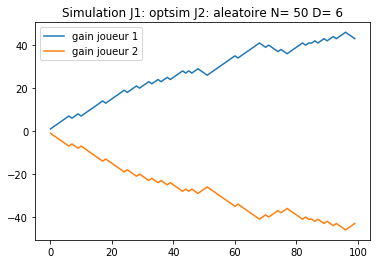

In [35]:
experience_simultanious("optsim","aleatoire",50,6)

Espérance de gain du joueur 1 : 0.09
Espérance de gain du joueur 2 : -0.09


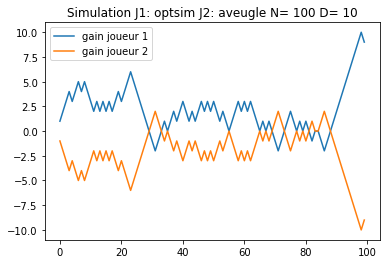

In [37]:
experience_simultanious("optsim","aveugle",100,10)

Espérance de gain du joueur 1 : -0.06
Espérance de gain du joueur 2 : 0.06


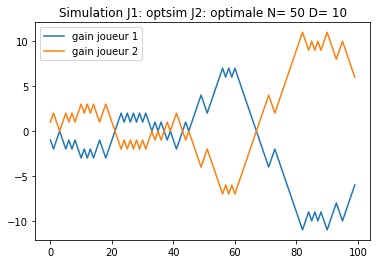

In [40]:
experience_simultanious("optsim","optimale",50,10)

Espérance de gain du joueur 1 : 0.06
Espérance de gain du joueur 2 : -0.06


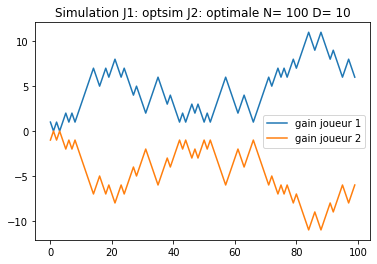

In [41]:
experience_simultanious("optsim","optimale",100,10)

Espérance de gain du joueur 1 : 0.07
Espérance de gain du joueur 2 : -0.07


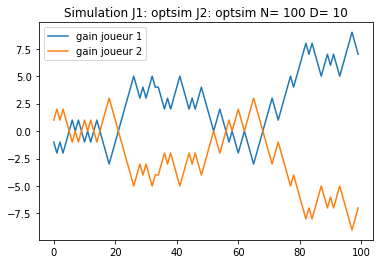

In [42]:
experience_simultanious("optsim","optsim",100,10)